Aguarde alguns minutos...
Pronto.


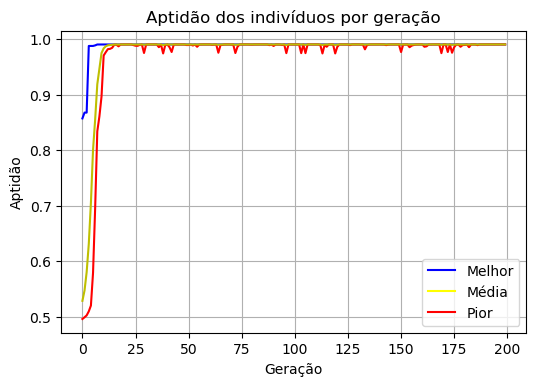

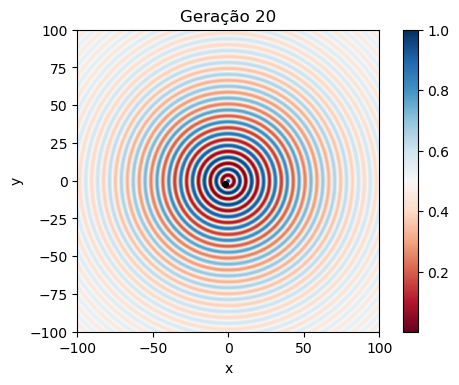

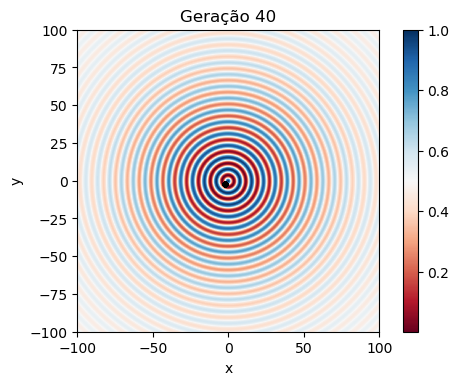

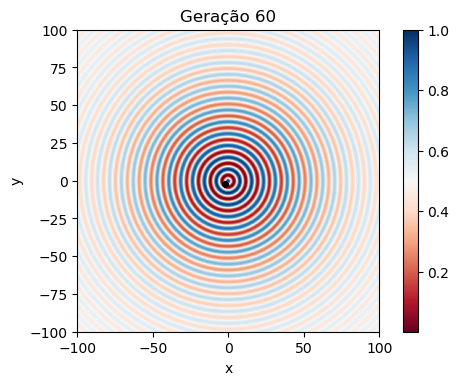

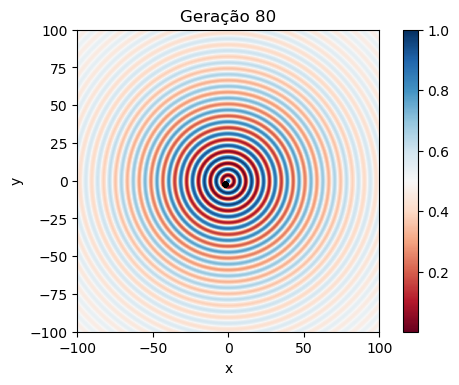

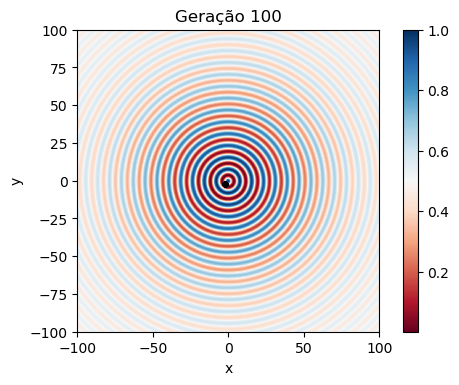

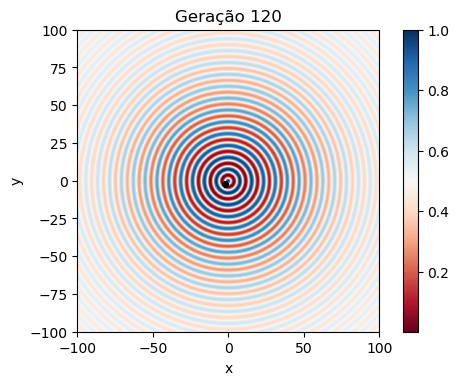

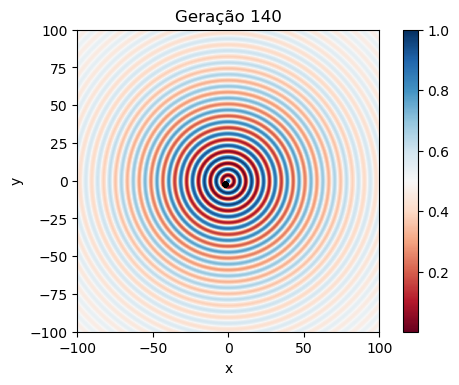

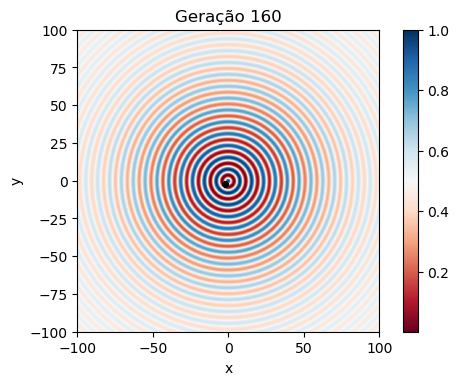

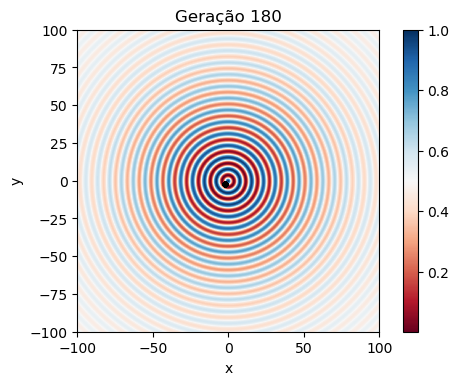

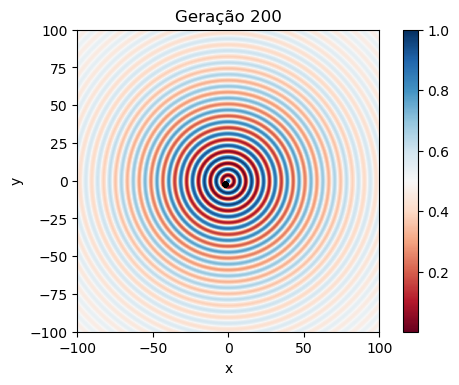

Melhor indivíduo (x,y) e o seu resultado(z):
[-2.124057 -2.310938  0.990284]


In [19]:
#Inicialização
import matplotlib.pyplot as plt
import numpy as np
import math as m
#np.random.seed(0)

#Gerações
ger=200

#Número de indivíduos/população a cada geração.
popu = 100

#Mínimo e máximo reais de cada indivíduo
intervalo = [-100,100]

#Taxa de cruzamento
cruz_tx=0.75

#Taxa de mutação
muta_tx=0.01

#Elitismo singular
elit_si=False

#GAP do Elitismo
gap=0.40

#inicialização da população 2D com valores aleatórios.
popf = np.random.uniform(intervalo[0],intervalo[1],[popu,2])

#Função de conversão real para binário com 28 dígitos.
#array_pop é o array 2D com a representação real de cada indivíduo da população.
#interv é a tupla [a1,a2], onde a1 é o valor mínimo real de cada indivíduo e a2 o valor máximo.
def real_bin(array_pop, interv):
    popb = np.zeros([len(array_pop),2],dtype=float)
    popb2 = np.chararray([len(array_pop)],56)
    for i in range(len(array_pop)):
        popb[i] = [abs(interv[0])+array_pop[i,0],abs(interv[0])+array_pop[i,1]]
        popb[i] = [(popb[i,0])/((interv[1]-interv[0])/((2**28)-1)),(popb[i,1])/((interv[1]-interv[0])/((2**28)-1))]
        popb2[i] = (format(int(popb[i,0]),'028b'))+(format(int(popb[i,1]),'028b'))
    return(popb2)

#Função de conversão binário com 28 dígitos para real
#array_popr é o array 1D com a representação binária de cada indivíduo da população.
#interv é a tupla [a1,a2], onde a1 é o valor mínimo real de cada indivíduo e a2 o valor máximo.
def bin_real(array_popb, interv):
    popr = np.chararray([len(array_popb)],56)
    popr2 = np.zeros([len(array_popb),2],dtype=float) 
    popr = array_popb[:]
    for i in range(len(array_popb)):
        popr2[i] = [int(popr[i][:28],2),int(popr[i][28:],2)]
        popr2[i] = [(popr2[i,0])*((interv[1]-interv[0])/((2**28)-1)),(popr2[i,1])*((interv[1]-interv[0])/((2**28)-1))]
        popr2[i] = [popr2[i,0]-abs(interv[0]),popr2[i,1]-abs(interv[0])]   
    return(popr2)

#Cruzamento

def F6(x,y):
    r=0.5-((m.sin(m.sqrt(x**2+y**2))**2)-0.5)/((1+0.001*(x**2+y**2))**2)
    return r

def aptd(pop):
    if isinstance(pop,np.chararray):
        popr=bin_real(pop,intervalo)
    elif isinstance(pop,np.ndarray):
        popr=pop[:]
    ap=np.zeros(len(popr),dtype=float)
    apt=np.zeros(len(popr),dtype=float)
    for i in range(len(popr)):
        ap[i]=F6(popr[i][0],popr[i][1])
        if i == (len(popr)-1):
            for k in range(len(popr)):
                apt[k] = ap[k]/np.amax(ap)
    return apt

def cruz(pop):
    if isinstance(pop,np.chararray):
        popb=pop[:]
    elif isinstance(pop,np.ndarray):
        popb=real_bin(pop,intervalo)
    cru1=np.chararray([int(len(popb)*cruz_tx)],56)
    for i in range(0,len(cru1),2):
        pai1=np.random.choice(popb,p=(aptd(popb)/np.sum(aptd(popb))))
        pai2=np.random.choice(popb,p=(aptd(popb)/np.sum(aptd(popb))))
        gene1=pai1[np.random.randint(1,54):]
        gene2=pai2[np.random.randint(1,54):]
        filho1=pai1[:(56-len(gene2))]+gene2
        filho2=pai2[:(56-len(gene1))]+gene1
        cru1[i]=filho1
        if i < (len(cru1)-1):
            cru1[i+1]=filho2
    for k in range(len(cru1)):
        popb[k]=cru1[k]
    np.random.shuffle(popb)
    return popb

#Mutação

def mutat(pop):
    if isinstance(pop,np.chararray):
        popb=pop[:]
    elif isinstance(pop,np.ndarray):
        popb=real_bin(pop,intervalo)
    for i in range(len(popb)):
        for k in range(len(popb[i])):
            if np.random.random()>=(1-muta_tx):
                mut1=list(popb[i].decode('ascii'))
                mut1[k]=str(abs(int((popb[i].decode('ascii'))[k])-1))
                popb[i]=("".join(mut1)).encode('ascii')
    return popb

#Experimento

def xp():
    print("Aguarde alguns minutos...")
    best=np.zeros([ger,3],dtype=float)
    worst=np.zeros([ger,3],dtype=float)
    mean=np.zeros([ger],dtype=float)
    resul=np.zeros([ger,7],dtype=float)
    popsamp=[]
    pop=popf[:]
    for i in range(ger):
        stat=np.flip(pop[np.argsort(aptd(pop))[-(int(gap*popu)):]])
        if elit_si:
            elit=pop[aptd(pop).argmax()]
            pop=cruz(pop)
            pop=mutat(pop)
            pop=bin_real(pop,intervalo)
            pop[aptd(pop).argmin()]=[elit[0],elit[1]]
        else:
            pop=cruz(pop)
            pop=mutat(pop)
            pop=bin_real(pop,intervalo)
        
        for k in range(int(gap*popu)):
            pop[aptd(pop).argmin()]=[stat[k,0],stat[k,1]]
        ap=aptd(pop)
        best[i]=[round(pop[ap.argmax()][0],6),round(pop[ap.argmax()][1],6),round(F6(pop[ap.argmax()][0],pop[ap.argmax()][1]),6)]
        worst[i]=[round(pop[ap.argmin()][0],6),round(pop[ap.argmin()][1],6),round(F6(pop[ap.argmin()][0],pop[ap.argmin()][1]),6)]
        F6V=np.vectorize(F6)
        mean[i]=np.mean(F6V(pop[:,0],pop[:,1]))
        if i in [19,39,59,79,99,119,139,159,179,199]:
            popsamp.append(pop)
        if i==(ger-1):
            print("Pronto.")
    return best,worst,mean,popsamp

x=xp()

#Plotagem

%matplotlib inline
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib as mpl
import matplotlib.lines as mlines
mpl.rcParams['figure.dpi'] = 100

def F5(x,y):
    return 0.5-((np.sin(np.sqrt(x**2+y**2))**2)-0.5)/((1+0.001*(x**2+y**2))**2)

ff1=plt.figure(1)
blue_line = mlines.Line2D([], [], color='blue', label='Melhor')
yellow_line = mlines.Line2D([], [], color='yellow', label='Média')
red_line = mlines.Line2D([], [], color='red', label='Pior')
plt.legend(handles=[blue_line,yellow_line,red_line])
plt.title('Aptidão dos indivíduos por geração')
plt.xlabel('Geração')
plt.ylabel('Aptidão')
plt.grid(True)
plt.plot(x[0][:,2],'b')
plt.plot(x[1][:,2],'r')
plt.plot(x[2],'y')


#plt.scatter(popf[:,0],popf[:,1],s=10,c="black")
ff=np.zeros([10],dtype=object)
for i in range(10):
    ff[i]=plt.figure(i+2)
    plt.scatter(x[3][i][:,0],x[3][i][:,1],s=10,c="black")
    str_title="Geração {}".format((i+1)*20)
    plt.title(str_title)
    d = arange(-40,40,0.04)
    s = arange(-40,40,0.04)
    D,S = meshgrid(d, s)
    Z = F5(D,S)
    plt.xlabel('x')
    plt.ylabel('y')
    im = imshow(Z,cmap=cm.RdBu,extent=[-100,100,-100,100])
    colorbar(im)    
plt.show()

melhor_indv=x[0][x[0][:,2].argmax(),:]
print("Melhor indivíduo (x,y) e o seu resultado(z):")
print(melhor_indv)